In [2]:
import numpy as np 
import pandas as pd

In [15]:
data = pd.read_csv("Boston.csv")

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [17]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [19]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [20]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [21]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
y_pred = rfr.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_log_error
s = mean_squared_log_error(y_test, y_pred)

In [36]:
accuracy = 1 - s
accuracy

0.97603874274774416

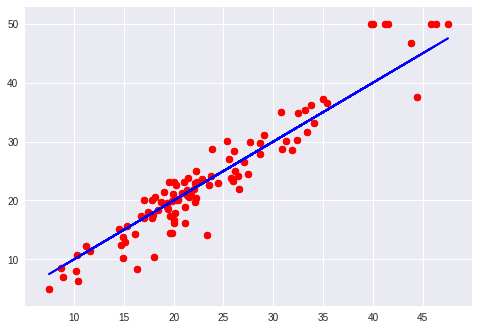

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test, c = 'red')
plt.plot(rfr.predict(X_test), y_pred, c = 'b')
plt.show()